In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from GeoScPlot.TwoDPlots import *


In [2]:
#Leer datos
petroData = pd.read_excel('../../geoquímica cajamarca.xlsx')
#Debido a que edité (bastante) la hoja de cálculo cuando hice el informe,
#es necesario dejar únicamente los datos originales.
dropCols = petroData.columns[5:]
petroData=petroData.drop(columns=dropCols).drop(index=0) #Tambien se retira la columna de tipo de roca.
newIndex = petroData['Sample']
petroData=petroData.set_index(newIndex, drop=False)
petroData = petroData.drop(columns='Sample')
#Para este set de datos, es necesario trasponer. Cada muestra es una fila.
petroData = petroData.transpose()
newCols = [e.replace('Zr XRF', 'Zr') for e in petroData.columns]
petroData.columns = newCols
petroData=petroData.drop(columns='Zr ICP')
petroData

,SiO2,TiO2,Al2O3,Fe2O3tot,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
PG3,45.58,2.29,14.56,12.26,0.161,4.68,11,2.71,0.61,0.28,...,1.926,0.819,2.111,0.377,2.181,0.414,1.27,0.219,1.13,0.183
PG9,48.57,1.54,14.35,11.86,0.204,8.16,9.21,2.61,0.1,0.132,...,4.59,1.599,5.59,1.117,6.61,1.346,4.216,0.71,3.91,0.598
PG30,48.93,2.17,14.39,13.99,0.2,5.62,9.46,1.98,0.16,0.176,...,4.958,1.776,6.439,1.194,7.434,1.579,4.539,0.701,4.261,0.575
PG31,46.69,1.59,16.45,11.06,0.18,6.41,12.7,1.6,0.08,0.187,...,3.741,1.372,5.058,0.914,5.449,1.186,3.318,0.502,3.005,0.4


In [3]:
#Leer otros datos
geochData = pd.read_excel('../../datos de roca total_proyecto 1.xls')
geochData =  geochData.loc[:5,:]
geochData= geochData.set_index(geochData['Muestras'], drop=False)
geochData = geochData.drop(columns = ['Muestras', 'SUMA'])
geochData

,SiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,TiO2,P2O5,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
Muestras,,,,,,,,,,,,,,,,,,,,,
ARQ2,45.86,16.58,10.23,0.144,8.26,10.53,1.81,0.05,1.88,0.260,...,5.005,1.704,5.995,1.072,6.167,1.293,3.732,0.618,3.341,0.476
ARQ21,46.29,14.52,12.99,0.181,5.84,12.98,1.90,0.09,2.23,0.216,...,5.464,1.882,7.517,1.401,8.564,1.928,5.452,0.839,4.894,0.727
ARQ27A,49.69,14.67,10.42,0.171,7.60,11.43,1.88,0.50,0.90,0.093,...,2.088,0.72,2.544,0.464,2.906,0.63,1.74,0.263,1.641,0.263
ARQ46,46.66,15.64,9.91,0.177,8.30,11.48,1.50,0.15,1.03,0.071,...,2.383,1.006,3.582,0.65,4.108,0.894,2.556,0.414,2.487,0.371
ARQ59,48.54,14.46,11.80,0.218,8.86,9.11,1.68,0.12,1.51,0.133,...,5.362,1.827,6.567,1.13,6.584,1.4729,4.454,0.63575,4.205,0.745
ARQ59B,47,14.43,11.86,0.215,7.83,9.98,2.46,0.45,1.66,0.142,...,6.125,2.065,6.438,1.307,7.507,1.473,5.134,0.971,5.167,0.885


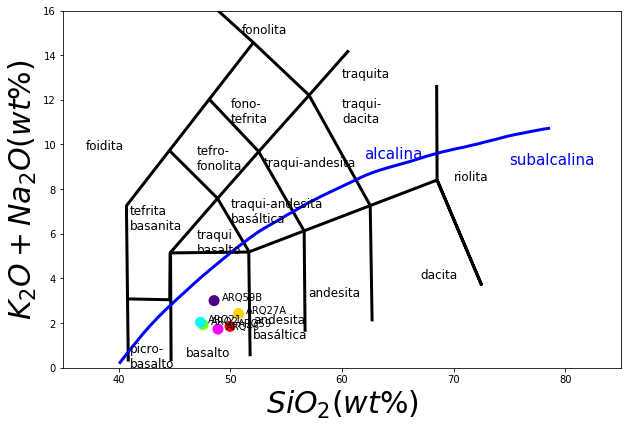

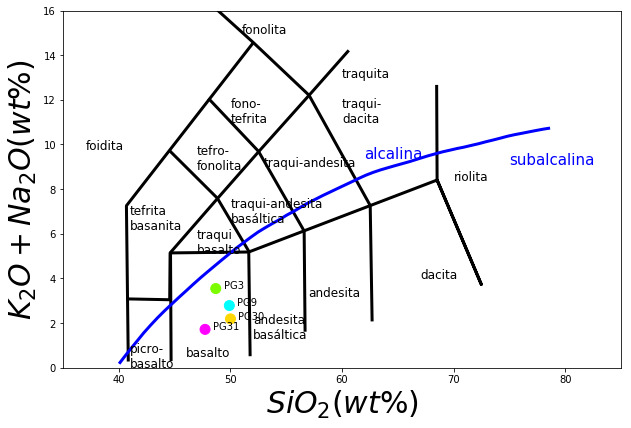

In [4]:
plotTAS(geochData)
plotTAS(petroData)

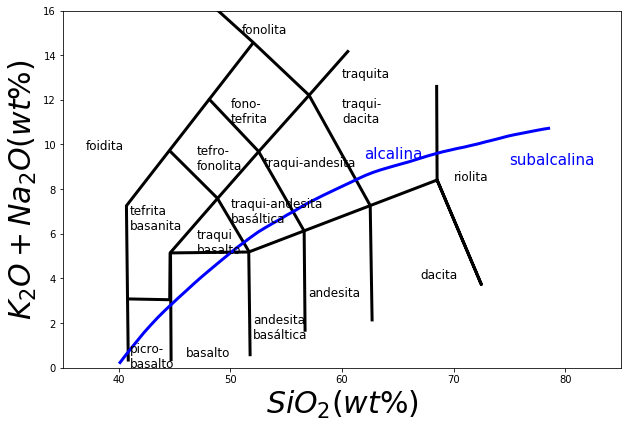

In [5]:
fig, ax = buildTas()
plt.gcf()
plt.savefig("../readme_pics/exampleTASTemp.png", dpi=300)

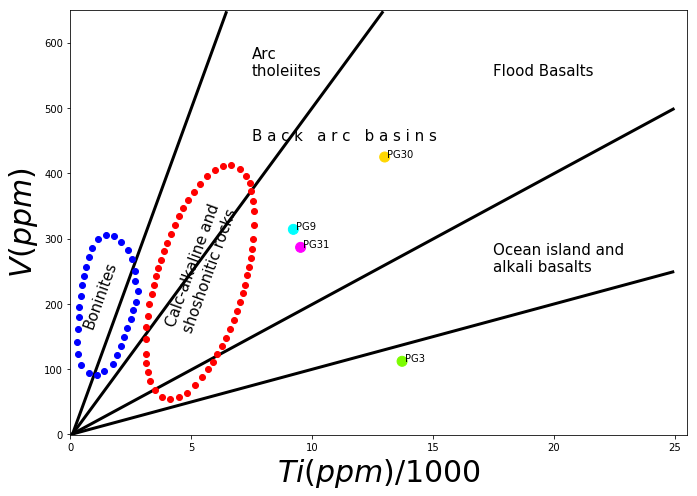

In [6]:
plotShervais(petroData, save=True, nombre = '../readme_pics/exampleShervais')

2


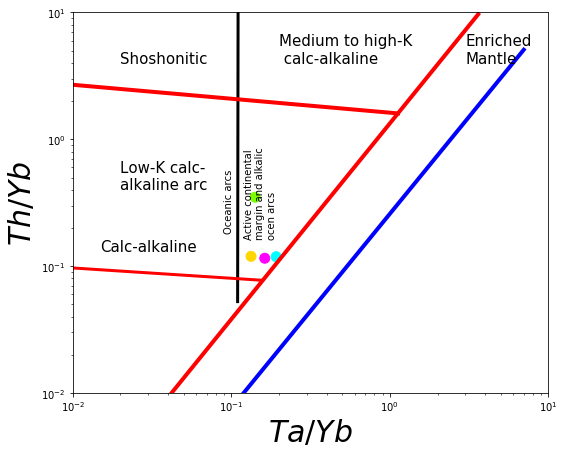

In [7]:
plotThTa(petroData)

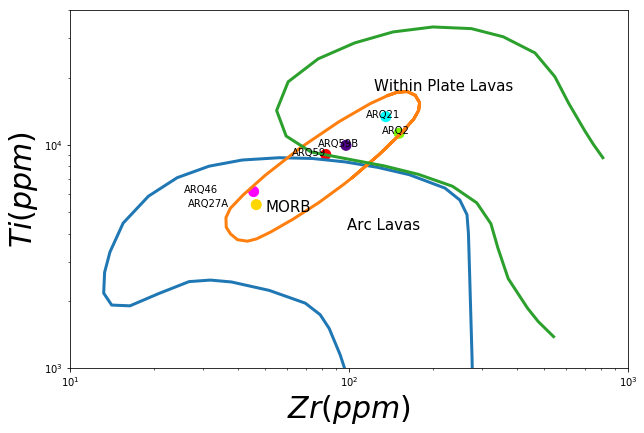

In [8]:
plotPierce(geochData)

In [9]:
import ternary

(<matplotlib.figure.Figure at 0x7fc2f80c7b50>,
 TernaryAxesSubplot: 8779710091329)

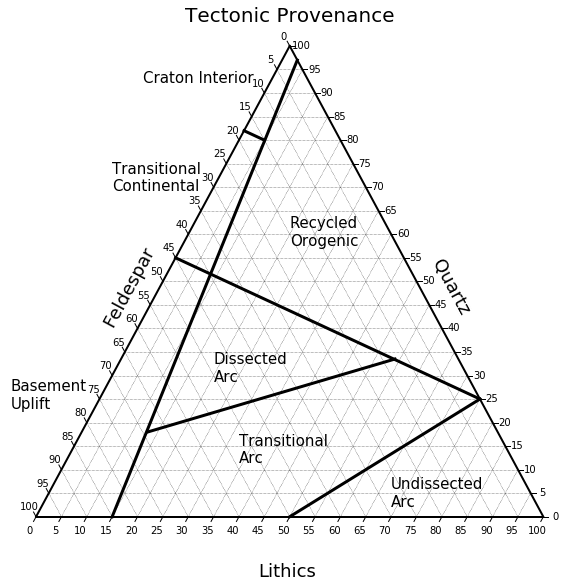

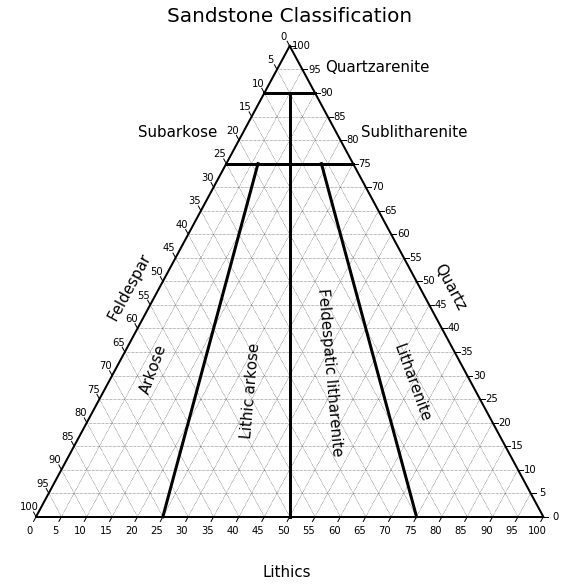

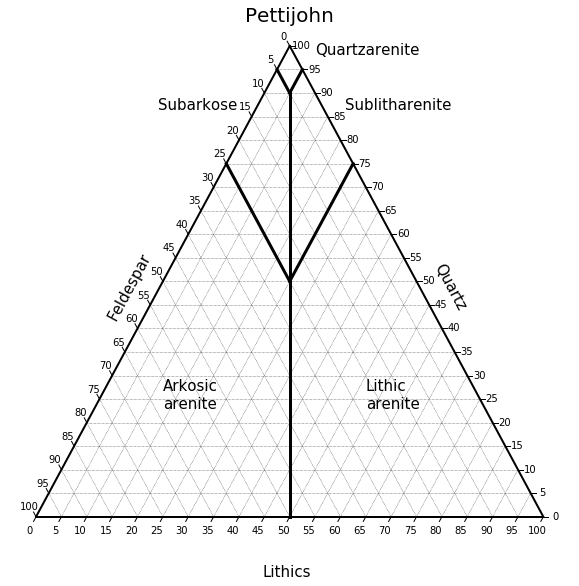

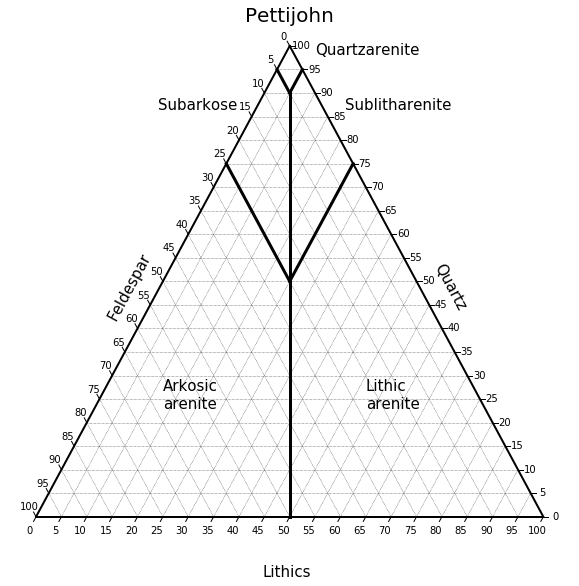

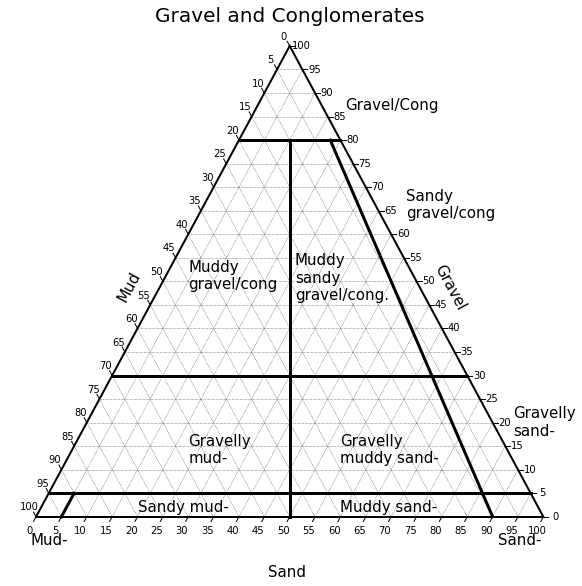

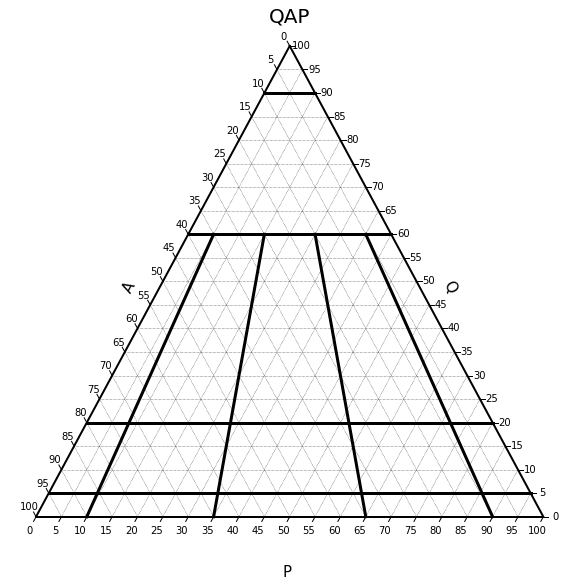

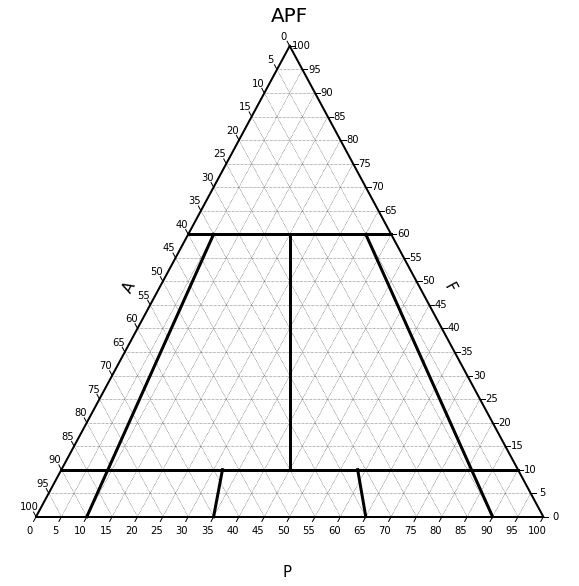

In [10]:
from GeoScPlot.TernaryPlots import *
buildProvenancePlot()
buildSSTClassification()
buildPettijohnSST()
buildPettijohnWacke()
buildCong()
buildQAP()
buildAPF()

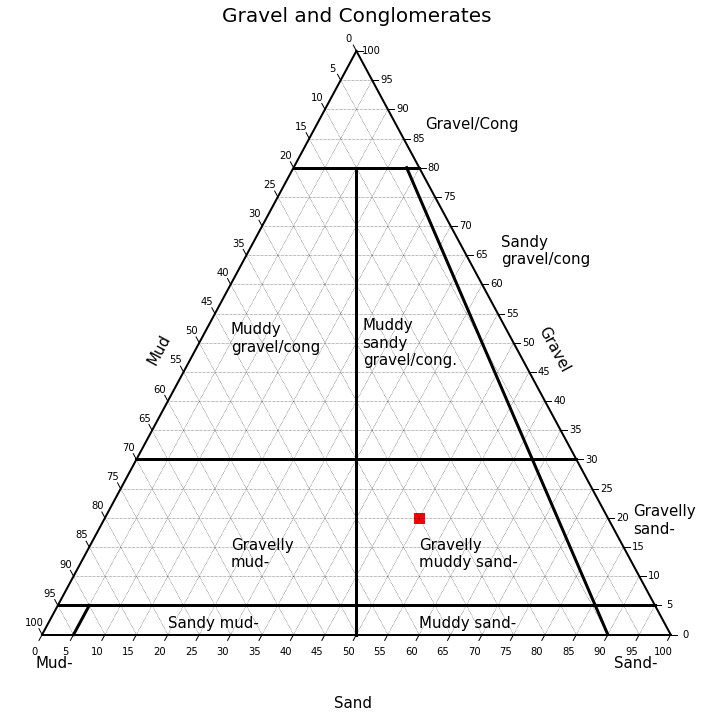

In [11]:
f, tax = buildCong()
rock = [50., 20.]
tax.scatter([rock], s =100, marker ='s', c='r')
plt.gcf()
plt.tight_layout()
plt.show()
f.savefig('../readme_pics/exampleGravelCongs.png', dpi=300)

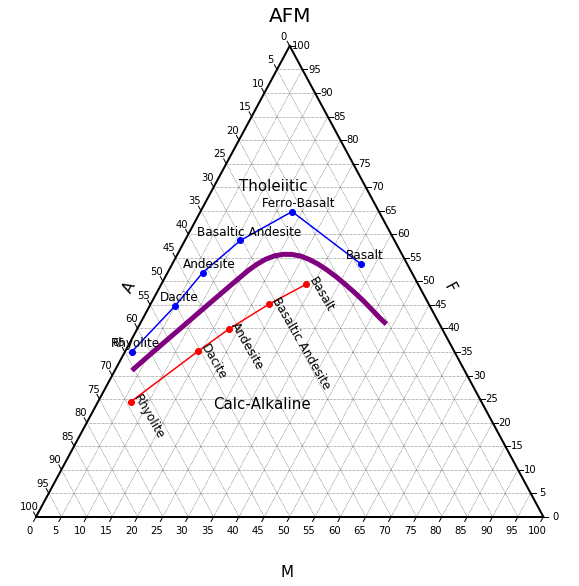

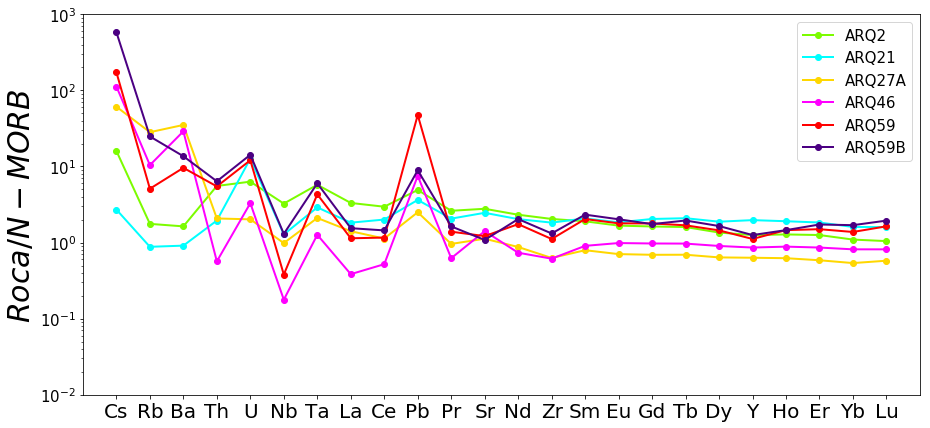

In [12]:
buildAFM()
plotSpider(geochData)